In [1]:
#CELL-NO: 1
import lightgbm as lgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
print ("All imports succesful")

All imports succesful


In [6]:
#CELL-NO: 2
# Generate regression dataset
X, y = make_regression(n_samples=5000, n_features=30, n_informative=20,
noise=10, random_state=42)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create LightGBM datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Set parameters
params = {
  'objective': 'regression',
  'metric': ['rmse', 'l1'],
  'boosting_type': 'gbdt',
  'num_leaves': 31,
  'learning_rate': 0.05,
  'feature_fraction': 0.9,
  'bagging_fraction': 0.8,
  'bagging_freq': 5,
  'verbose': -1
}

eval_result = {}
# Train the model
print("Training LightGBM model...")
lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=200,
    valid_sets=[train_data, test_data],
    valid_names=['train', 'valid'],
    callbacks=[lgb.early_stopping(stopping_rounds=20), lgb.log_evaluation(period=50),lgb.record_evaluation(eval_result=eval_result)]
)
print("model training with lgboost successful")

Training LightGBM model...
Training until validation scores don't improve for 20 rounds
[50]	train's rmse: 96.7004	train's l1: 75.6902	valid's rmse: 117.155	valid's l1: 92.6385
[100]	train's rmse: 48.9704	train's l1: 37.9267	valid's rmse: 81.3064	valid's l1: 63.5224
[150]	train's rmse: 28.7242	train's l1: 22.2632	valid's rmse: 65.2793	valid's l1: 51.1072
[200]	train's rmse: 20.3321	train's l1: 15.9892	valid's rmse: 57.9852	valid's l1: 45.3762
Did not meet early stopping. Best iteration is:
[200]	train's rmse: 20.3321	train's l1: 15.9892	valid's rmse: 57.9852	valid's l1: 45.3762
model training with lgboost successful


In [7]:
#CELL-NO: 3
# Make predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Evaluate performance
print("\nLightGBM Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R² Score: {r2_score(y_test, y_pred):.4f}")


LightGBM Regression Results:
RMSE: 57.9852
MAE: 45.3762
R² Score: 0.9359


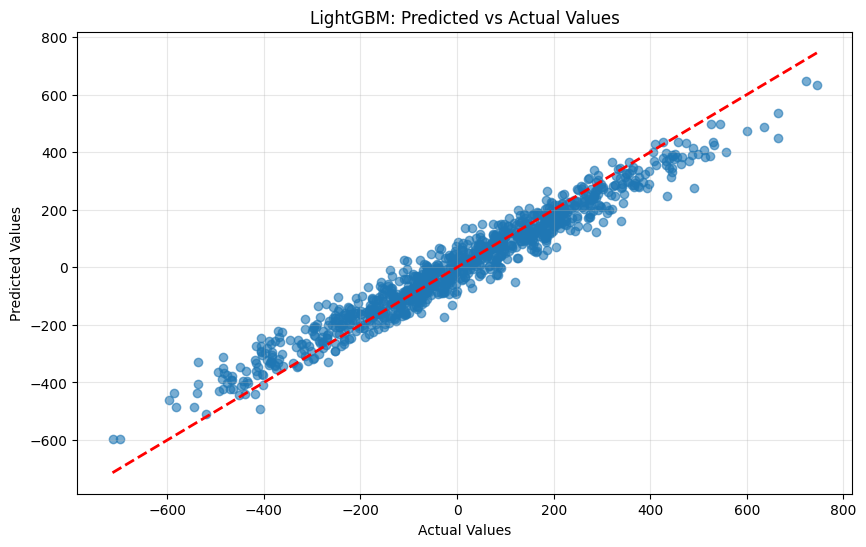

In [9]:
#CELL-NO: 4
# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--'
, lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('LightGBM: Predicted vs Actual Values')
plt.grid(True, alpha=0.3)
plt.show()

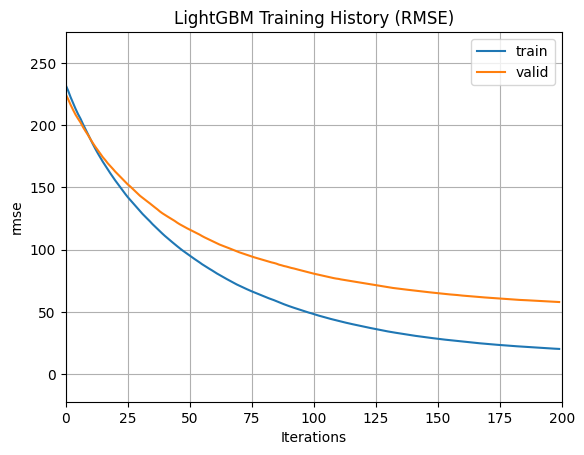

In [10]:
#CELL-NO: 5
# Plot training history
lgb.plot_metric(booster=eval_result, metric='rmse')
plt.title('LightGBM Training History (RMSE)')
plt.show()

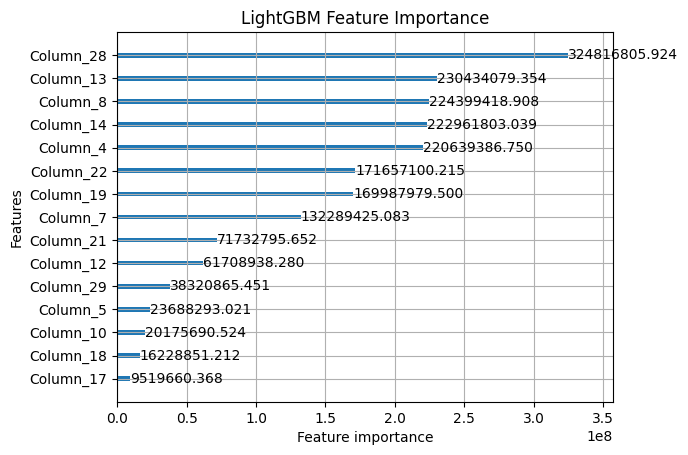

In [11]:
#CELL-NO: 6
# Feature importance
lgb.plot_importance(lgb_model, max_num_features=15, importance_type='gain')
plt.title('LightGBM Feature Importance')
plt.show()